<h1> Summative Assessment - Big Data Analytics </h1>

Importing Libaries/Open the Files

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns #visualisation
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

print(os.getcwd())
os.chdir('C:\\Users\\Jared\\OneDrive\\Documents\\University\\University of York\\3 - Big Data Analytics\\Raw Data')

#read csv file into a pandas dataframe
#data note - The supplied CSV file is a cleaned-up version of that provided by https://healthdata.gov/State/Behavioral-Risk-Factor-Surveillance-Survey-2015/r4vf-8w6z. We have made some changes to the way data is represented, and removed some rows that had problems, so that it will load as-is into WEKA. Other than that, it's the same dataset. 
raw_df = pd.read_csv("brfss_for_bda_2021.csv")

C:\Users\Jared\OneDrive\Documents\University\University of York\3 - Big Data Analytics\Raw Data


Exploratory Analysis

In [4]:
#take a look at the first few rows
print(raw_df)
# To display the top 5 rows
raw_df.head(5)
# To display the bottom 5 rows
raw_df.tail(5)
raw_df.dtypes

         _STATE  _GEOSTR _DENSTR2       PRECALL  SECSCRFL  REPNUM  REPDEPTH  \
0      New York      207        D  To be called       NaN   40187         5   
1      New York      207        D  To be called       NaN   60025        21   
2      New York      203        D  To be called       NaN  120050         3   
3      New York      206        D  To be called       NaN   30066        28   
4      New York      203        D  To be called       NaN  110026        23   
...         ...      ...      ...           ...       ...     ...       ...   
12333  New York      207        D  To be called       NaN   40007        14   
12334  New York      207        D  To be called       0.0   60048         8   
12335  New York      207        D  To be called       0.0   70002         4   
12336  New York      207        D  To be called       0.0   70019        20   
12337  New York      207        D  To be called       NaN   90036         1   

          FMONTH     IDATE    IMONTH  ...  PPS_45  

_STATE       object
_GEOSTR       int64
_DENSTR2     object
PRECALL      object
SECSCRFL    float64
             ...   
cracorg1     object
_prace1      object
mracasc1     object
_impcty      object
mracorg1     object
Length: 414, dtype: object

In [5]:
raw_df['_STATE'].describe()

count        12338
unique           1
top       New York
freq         12338
Name: _STATE, dtype: object

In [6]:
#Keep only specific column
#selected_cols = raw_df[["Age", "Sex"]]

'''
# Dropping irrelevant columns
df = df.drop([‘Engine Fuel Type’, ‘Market Category’, ‘Vehicle Style’, ‘Popularity’, ‘Number of Doors’, ‘Vehicle Size’], axis=1)
df.head(5)
df = df.rename(columns={“Engine HP”: “HP”, “Engine Cylinders”: “Cylinders”, “Transmission Type”: “Transmission”, “Driven_Wheels”: “Drive Mode”,”highway MPG”: “MPG-H”, “city mpg”: “MPG-C”, “MSRP”: “Price” })
df.head(5)

'''

'\n# Dropping irrelevant columns\ndf = df.drop([‘Engine Fuel Type’, ‘Market Category’, ‘Vehicle Style’, ‘Popularity’, ‘Number of Doors’, ‘Vehicle Size’], axis=1)\ndf.head(5)\ndf = df.rename(columns={“Engine HP”: “HP”, “Engine Cylinders”: “Cylinders”, “Transmission Type”: “Transmission”, “Driven_Wheels”: “Drive Mode”,”highway MPG”: “MPG-H”, “city mpg”: “MPG-C”, “MSRP”: “Price” })\ndf.head(5)\n\n'

In [7]:
# Total number of rows and columns
raw_df.shape

# Rows containing duplicate data
duplicate_rows_df = raw_df[raw_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

# Used to count the number of rows before removing the data
raw_df.count()

# Dropping the duplicates 
deduped_df = raw_df.drop_duplicates()
deduped_df.head(5)

number of duplicate rows:  (0, 414)


,_STATE,_GEOSTR,_DENSTR2,PRECALL,SECSCRFL,REPNUM,REPDEPTH,FMONTH,IDATE,IMONTH,...,PPS_45,PPS_46,PPS_48,PPS_52,childage,cracorg1,_prace1,mracasc1,_impcty,mracorg1
0,New York,207,D,To be called,NaN,40187,5,April,4092015,April,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
1,New York,207,D,To be called,NaN,60025,21,June,6232015,June,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
2,New York,203,D,To be called,NaN,120050,3,December,12282015,December,...,No,No,No,No,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
3,New York,206,D,To be called,NaN,30066,28,March,3182015,March,...,No,No,No,No,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
4,New York,203,D,To be called,NaN,110026,23,November,11292015,November,...,No,No,No,No,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...


In [8]:
# Finding the null values.
print(deduped_df.isnull().sum())

# Dropping the missing values.
dropna_df = deduped_df.dropna()
dropna_df2 = deduped_df.dropna(axis='columns')
#dropna_df.count()

# After dropping the values
print(dropna_df.isnull().sum())
dropna_df2.describe

_STATE         0
_GEOSTR        0
_DENSTR2       0
PRECALL        0
SECSCRFL    3911
            ... 
cracorg1       0
_prace1        0
mracasc1       0
_impcty        0
mracorg1       0
Length: 414, dtype: int64
_STATE      0.0
_GEOSTR     0.0
_DENSTR2    0.0
PRECALL     0.0
SECSCRFL    0.0
           ... 
cracorg1    0.0
_prace1     0.0
mracasc1    0.0
_impcty     0.0
mracorg1    0.0
Length: 414, dtype: float64


<bound method NDFrame.describe of          _STATE  _GEOSTR _DENSTR2       PRECALL  REPNUM  REPDEPTH     FMONTH  \
0      New York      207        D  To be called   40187         5      April   
1      New York      207        D  To be called   60025        21       June   
2      New York      203        D  To be called  120050         3   December   
3      New York      206        D  To be called   30066        28      March   
4      New York      203        D  To be called  110026        23   November   
...         ...      ...      ...           ...     ...       ...        ...   
12333  New York      207        D  To be called   40007        14      April   
12334  New York      207        D  To be called   60048         8       June   
12335  New York      207        D  To be called   70002         4       July   
12336  New York      207        D  To be called   70019        20       July   
12337  New York      207        D  To be called   90036         1  September   

     

In [9]:
# Finding the null values.
print(deduped_df.isnull().sum())

# Filling the missing values.
fillna_df = deduped_df.fillna(0)

# After filling the values
print(fillna_df.isnull().sum())

_STATE         0
_GEOSTR        0
_DENSTR2       0
PRECALL        0
SECSCRFL    3911
            ... 
cracorg1       0
_prace1        0
mracasc1       0
_impcty        0
mracorg1       0
Length: 414, dtype: int64
_STATE      0
_GEOSTR     0
_DENSTR2    0
PRECALL     0
SECSCRFL    0
           ..
cracorg1    0
_prace1     0
mracasc1    0
_impcty     0
mracorg1    0
Length: 414, dtype: int64


In [10]:
'''
def remove_outlier_IQR(deduped_df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

df_outlier_removed=remove_outlier_IQR(deduped_df)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final
'''

'\ndef remove_outlier_IQR(deduped_df):\n    Q1=df.quantile(0.25)\n    Q3=df.quantile(0.75)\n    IQR=Q3-Q1\n    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]\n    return df_final\n\ndf_outlier_removed=remove_outlier_IQR(deduped_df)\ndf_outlier_removed=pd.DataFrame(df_outlier_removed)\nind_diff=df.index.difference(df_outlier_removed.index)\n\nfor i in range(0, len(ind_diff),1):\n    df_final=df.drop([ind_diff[i]])\n    df=df_final\n'

<ipython-input-11-355c5d568773>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final=fillna_df[~((fillna_df<(Q1-1.5*IQR)) | (fillna_df>(Q3+1.5*IQR))).any(axis=1)]
<ipython-input-11-355c5d568773>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final=fillna_df[~((fillna_df<(Q1-1.5*IQR)) | (fillna_df>(Q3+1.5*IQR))).any(axis=1)]


_GEOSTR          99.00
SECSCRFL          1.00
REPNUM        59625.25
REPDEPTH         15.00
IDATE       6050000.00
               ...    
PAMIN21_         60.00
PA1MIN_         330.00
PAVIG11_          0.00
PAVIG21_          0.00
PA1VIGM_         42.00
Length: 101, dtype: float64


<AxesSubplot:xlabel='PA1MIN_'>

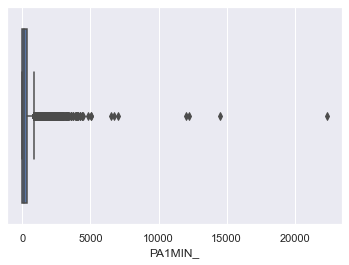

In [11]:
Q1=fillna_df.quantile(0.25)
Q3=fillna_df.quantile(0.75)
IQR=Q3-Q1
df_final=fillna_df[~((fillna_df<(Q1-1.5*IQR)) | (fillna_df>(Q3+1.5*IQR))).any(axis=1)]
df_final.head(5)
print(IQR)
'''
df_outlier_removed=remove_outlier_IQR(fillna_df)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final
'''
fillna_df.shape
sns.boxplot(x=fillna_df['PA1MIN_'])

#deduped_df['HHADULT'].describe()

Research Question #1

In [12]:
one_RQ=df_final[["PA1MIN_","MISTMNT", "MISNOWRK", "MENTHLTH", "PHYSHLTH", "QLACTLM2", "POORHLTH", "EXERANY2"]]
x = one_RQ.drop('PA1MIN_', axis =1)
y = one_RQ['PA1MIN_']

# handle categorical variable
misnowork=pd.get_dummies(x,drop_first=True)
# dropping extra column
x = x.drop(['MISNOWRK', 'MISTMNT', 'MENTHLTH', 'PHYSHLTH', 'QLACTLM2', 'POORHLTH', 'EXERANY2'],axis=1)
# concatation of independent variables and new cateorical variable.
x=pd.concat([x,misnowork],axis=1)
x

,MISTMNT_No,MISTMNT_Not asked or Missing,MISTMNT_Refused,MISTMNT_Yes,MISNOWRK_None,MISNOWRK_Not asked or Missing,MISNOWRK_Number of days,MISNOWRK_Refused,MENTHLTH_None,MENTHLTH_Number of days,...,PHYSHLTH_Number of days,PHYSHLTH_Refused,QLACTLM2_No,QLACTLM2_Refused,QLACTLM2_Yes,POORHLTH_None,POORHLTH_Not asked or Missing,POORHLTH_Number of days,POORHLTH_Refused,EXERANY2_Yes
334,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
341,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
343,0,0,0,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
356,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
360,1,0,0,0,1,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
12179,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
12183,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,1,1,0,0,0,1
12211,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [13]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
one_RQ_LM=LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)

In [14]:
#To retrieve the intercept:
print(LR.intercept_)

#For retrieving the slope:
print(LR.coef_)

#one_RQ_LM.summary()

-37.02094788519713
[ -4.75067648   2.81472785  -4.30128481  -7.38282638   8.15357465
   2.81472785  15.41217585   4.69901703  13.386261    -0.87330715
  18.81571519  14.87738065  13.66076695  -3.2962679   -8.4561151
 -16.90215419 -11.24202611  26.10532585  16.55353068  19.1818513
  34.65451845 127.80821208]


In [15]:
# pair the feature names with the coefficients
list(zip(x_train, LR.coef_))

#LR.summary()

[('MISTMNT_No', -4.7506764758139255),
 ('MISTMNT_Not asked or Missing', 2.8147278547099517),
 ('MISTMNT_Refused', -4.301284805772452),
 ('MISTMNT_Yes', -7.382826376821621),
 ('MISNOWRK_None', 8.153574650312454),
 ('MISNOWRK_Not asked or Missing', 2.8147278547099024),
 ('MISNOWRK_Number of days', 15.412175852601017),
 ('MISNOWRK_Refused', 4.699017028513871),
 ('MENTHLTH_None', 13.386260997339173),
 ('MENTHLTH_Number of days', -0.8733071524496155),
 ('MENTHLTH_Refused', 18.815715193300864),
 ('PHYSHLTH_None', 14.877380651596155),
 ('PHYSHLTH_Number of days', 13.66076695376146),
 ('PHYSHLTH_Refused', -3.296267902472598),
 ('QLACTLM2_No', -8.456115099607672),
 ('QLACTLM2_Refused', -16.902154188830586),
 ('QLACTLM2_Yes', -11.24202611368667),
 ('POORHLTH_None', 26.10532584943584),
 ('POORHLTH_Not asked or Missing', 16.553530679326524),
 ('POORHLTH_Number of days', 19.18185130397282),
 ('POORHLTH_Refused', 34.65451845356896),
 ('EXERANY2_Yes', 127.80821208420427)]

In [16]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.5041894532359028
mean_sqrd_error is== 4615.623096636708
root_mean_squared error of is== 67.93837720049477


Research Question #2

In [17]:
two_RQ=df_final[["DIABETE3","PDIABTST", "SSBFRUT2", "SSBSUGR1", "AGE", "_RFBMI5", "BLDSUGAR"]]
a = two_RQ.drop('DIABETE3', axis =1)
b = two_RQ['DIABETE3']

# handle categorical variable
pdiabtst=pd.get_dummies(a,drop_first=True)
# dropping extra column
a = a.drop(['PDIABTST', 'SSBFRUT2', 'SSBSUGR1', 'AGE', '_RFBMI5', 'BLDSUGAR', 'PDIABTST'],axis=1)
# concatation of independent variables and new cateorical variable.
a = pd.concat([a,pdiabtst],axis=1)
a

,PDIABTST_No,PDIABTST_Not asked or Missing,PDIABTST_Refused,PDIABTST_Yes,SSBFRUT2_Never,SSBFRUT2_Not asked or Missing,SSBFRUT2_Times per day,SSBFRUT2_Times per month,SSBFRUT2_Times per week,SSBSUGR1_Never,...,AGE_Age 45 - 54,AGE_Age 55 - 64,AGE_Age 65 or older,_RFBMI5_No,_RFBMI5_Yes,BLDSUGAR_Not asked or Missing,BLDSUGAR_Refused,BLDSUGAR_Times per day,BLDSUGAR_Times per month,BLDSUGAR_Times per week
334,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
341,0,1,0,0,1,0,0,0,0,1,...,0,0,1,1,0,1,0,0,0,0
343,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,1,1,0,0,0,0
356,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
360,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
12179,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
12183,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
12211,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


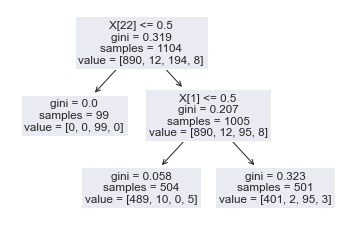

In [18]:
# splitting the data
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.2,random_state = 0)
# creating an object of LinearRegression class
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
# fitting the training data
two_RQ_LM=clf.fit(a_train,b_train)
b_prediction =  clf.predict(a_test)
tree.plot_tree(clf);

In [19]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",100*round(metrics.accuracy_score(b_test, b_prediction),3), "%")

Accuracy: 88.4 %


In [20]:
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
'''
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())
'''

"\nfrom sklearn.tree import export_graphviz\nfrom six import StringIO  \nfrom IPython.display import Image  \nimport pydotplus\n\ndot_data = StringIO()\nexport_graphviz(clf, out_file=dot_data,  \n                filled=True, rounded=True,\n                special_characters=True,feature_names = feature_cols,class_names=['0','1'])\ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())  \ngraph.write_png('diabetes.png')\nImage(graph.create_png())\n"

In [21]:
#https://www.kdnuggets.com/2019/08/understanding-decision-trees-classification-python.html
importances = pd.DataFrame({'feature':a_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
22,BLDSUGAR_Not asked or Missing,0.898
1,PDIABTST_Not asked or Missing,0.102
0,PDIABTST_No,0.000
14,SSBSUGR1_Times per week,0.000
25,BLDSUGAR_Times per month,0.000
24,BLDSUGAR_Times per day,0.000
23,BLDSUGAR_Refused,0.000
21,_RFBMI5_Yes,0.000
20,_RFBMI5_No,0.000
19,AGE_Age 65 or older,0.000


Research Question #3

In [22]:
three_RQ=df_final[["MEDICARE", "AGE", "POORHLTH", "CHCKIDNY"]]
c = three_RQ.drop('MEDICARE', axis =1)
d = three_RQ['MEDICARE']

# handle categorical variable
incomeg = pd.get_dummies(c,drop_first=True)
# dropping extra column
c = c.drop(["AGE", "POORHLTH", "CHCKIDNY"],axis=1)
# concatation of independent variables and new cateorical variable.
c = pd.concat([c,incomeg],axis=1)
c

,AGE_Age 25 - 34,AGE_Age 35 - 44,AGE_Age 45 - 54,AGE_Age 55 - 64,AGE_Age 65 or older,POORHLTH_None,POORHLTH_Not asked or Missing,POORHLTH_Number of days,POORHLTH_Refused,CHCKIDNY_No,CHCKIDNY_Yes
334,0,0,1,0,0,0,1,0,0,1,0
341,0,0,0,0,1,0,1,0,0,1,0
343,0,0,0,0,1,0,0,0,1,1,0
356,0,0,1,0,0,1,0,0,0,1,0
360,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
12175,0,0,0,0,1,1,0,0,0,1,0
12179,0,0,0,0,1,0,0,1,0,1,0
12183,0,0,0,1,0,1,0,0,0,1,0
12211,0,1,0,0,0,0,1,0,0,1,0


In [23]:
df_final["MEDICARE"].unique()

array(['No', 'Yes', 'Refused', 'Not asked or Missing',
       "Don't know/Not sure"], dtype=object)

In [24]:
replace_medicare = {'MEDICARE': {'Yes': 1, 'AS': 2, 'B6': 3, 'DL': 4,
                                  'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}

In [25]:
# splitting the data
c_train, c_test, d_train, d_test = train_test_split(c, d, test_size = 0.2,random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_c = StandardScaler()
c_train = sc_c.fit_transform(c_train)
c_test = sc_c.transform(c_test)

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0)
logistic.fit(c_train, d_train)
d_pred = logistic.predict(c_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(d_test, d_pred)
d_pred

array(['No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes

In [26]:
from sklearn.metrics import classification_report
print(classification_report(d_test, d_pred))

                      precision    recall  f1-score   support

 Don't know/Not sure       0.00      0.00      0.00         1
                  No       0.86      0.96      0.91       134
Not asked or Missing       0.00      0.00      0.00         6
             Refused       0.00      0.00      0.00         1
                 Yes       0.94      0.88      0.91       135

            accuracy                           0.90       277
           macro avg       0.36      0.37      0.36       277
        weighted avg       0.87      0.90      0.88       277



C:\Users\Jared\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jared\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jared\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
df_final['PAFREQ1_'].unique()

array([    0.,  2000.,  1167.,  7000.,  4000.,  5000.,  1000.,  3000.,
        1867.,  4667.,   933.,  2333.,  1400.,  5833.,  3500.,   467.,
        6000.,  2800.,   233.,  3267.,  1633.,   700., 10000.,  6767.,
        5367.,  3733.,  6533.,  6300.,  4200.])

In [28]:
raw_df['CELLFON3'].unique()

array(['Missing', 'Yes', 'Not a cellular phone'], dtype=object)

<AxesSubplot:xlabel='PAFREQ1_'>

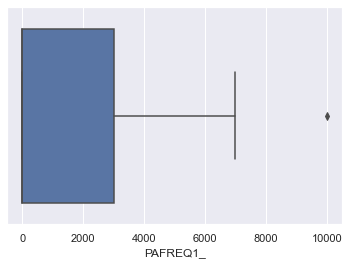

In [29]:
sns.boxplot(x=df_final['PAFREQ1_'])

In [30]:
df_final.shape

(1381, 414)

In [31]:
dropna_df.shape

(0, 414)

In [32]:
deduped_df.shape

(12338, 414)

In [35]:
#remove_outlier_IQR(fillna_df)

In [ ]:
df = df[~((df < (Q1–1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_final.shape

In [ ]:
#Remove extra white space
df_final.columns = df_final.columns.str.strip()

In [ ]:
df_final.dtypes

In [ ]:
two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Plotting a Histogram
df.Make.value_counts().nlargest(40).plot(kind=’bar’, figsize=(10,5))
plt.title(“Number of cars by make”)
plt.ylabel(‘Number of cars’)
plt.xlabel(‘Make’);

In [ ]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df[‘HP’], df[‘Price’])
ax.set_xlabel(‘HP’)
ax.set_ylabel(‘Price’)
plt.show()

In [ ]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap=”BrBG”,annot=True)
c

<h2>Saving Research Question Datasets </h2>

In [42]:
#Stitching together
z = pd.concat([y,x],axis=1) #RQ1
e = pd.concat([b,a],axis=1) #RQ2
f = pd.concat([d,c],axis=1) #RQ3

#write final data set - 
z.to_csv('researchquestionONE.csv') #RQ1
e.to_csv('researchquestionTWO.csv') #RQ2
f.to_csv('researchquestionTHREE.csv') #RQ3


In [41]:
e

,DIABETE3,PDIABTST_No,PDIABTST_Not asked or Missing,PDIABTST_Refused,PDIABTST_Yes,SSBFRUT2_Never,SSBFRUT2_Not asked or Missing,SSBFRUT2_Times per day,SSBFRUT2_Times per month,SSBFRUT2_Times per week,...,AGE_Age 45 - 54,AGE_Age 55 - 64,AGE_Age 65 or older,_RFBMI5_No,_RFBMI5_Yes,BLDSUGAR_Not asked or Missing,BLDSUGAR_Refused,BLDSUGAR_Times per day,BLDSUGAR_Times per month,BLDSUGAR_Times per week
334,No,0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
341,No,0,1,0,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
343,No,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
356,No,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
360,No,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,Yes,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
12179,Yes,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
12183,No,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
12211,No,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
